In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
# puede ser necesario o no, dependiendo de su versión de NoteBook
%matplotlib inline

In [3]:
df = pd.read_csv('./datafinal.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   limit_bal           30000 non-null  float64
 2   sex                 30000 non-null  int64  
 3   education           30000 non-null  int64  
 4   marriage            30000 non-null  int64  
 5   age                 30000 non-null  int64  
 6   pay_sep             30000 non-null  int64  
 7   pay_ago             30000 non-null  int64  
 8   pay_jul             30000 non-null  int64  
 9   pay_jun             30000 non-null  int64  
 10  pay_may             30000 non-null  int64  
 11  pay_apr             30000 non-null  int64  
 12  bill_amt_sep        30000 non-null  float64
 13  bill_amt_ago        30000 non-null  float64
 14  bill_amt_jul        30000 non-null  float64
 15  bill_amt_jun        30000 non-null  float64
 16  bill

In [5]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_ago,pay_jul,pay_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month
0,1,20000.0,1,2,0,24,2,0,-1,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,2,1,26,0,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,2,1,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,2,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,0,2,0,57,0,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Preparación de los datos

In [6]:
# eliminar columna con info poco valiosa
df.drop('id', axis=1, inplace=True)

In [7]:
var_dummies = ['education', 'marriage', 'pay_sep', 'pay_ago', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']

for i in var_dummies:
    # convertir a variables dummies
    value_dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df.drop(i, axis=1), value_dummies], axis=1)

df.columns

Index(['limit_bal', 'sex', 'age', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'education_1',
       'education_2', 'education_3', 'education_4', 'marriage_1', 'marriage_2',
       'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5',
       'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1',
       'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6',
       'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2',
       'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7',
       'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4',
       'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', 'pay_ap

## División Train/Test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Se eliminan todas las columnas que no estan altamente correlacionadas con la variable y
X = df.drop(['limit_bal', 'sex', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_apr', 'payment_next_month', 'education_1',
       'education_2', 'education_3', 'education_4', 'marriage_1', 'marriage_2'], axis=1).values
#X = df[['pay_sep', 'pay_may', 'pay_jun', 'pay_apr', 'pay_ago', 'pay_jul', 'pay_amt_may', 'pay_amt_jun', 'age']].values
y = df['payment_next_month'].values

## Balancing data

In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

sm = SMOTE(random_state=2)
X_balanced, y_balanced = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))

Before OverSampling, counts of label '1': 6636
Before OverSampling, counts of label '0': 23364 

After OverSampling, the shape of train_X: (46728, 51)
After OverSampling, the shape of train_y: (46728,) 

After OverSampling, counts of label '1': 23364
After OverSampling, counts of label '0': 23364


In [11]:
# dividir en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=101)

In [12]:
len(y_train)

37382

## Normalización de los datos

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

## SVM

###  SVC (Support Vector Classifier)

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
# Definir los kernels que vamos a probar
kernels = ['rbf', 'linear', 'poly', 'sigmoid']

svc = SVC()
hyperParam = [{'kernel': kernels}]

gsv = GridSearchCV(svc, hyperParam, cv = 6, verbose = 2, n_jobs=4)

# Entrenar el modelo
best_model = gsv.fit(X_train, y_train)

# Predecir resultados
svc_pred_mms = best_model.best_estimator_.predict(X_test)

print("Mejor hiperparametro: ", gsv.best_params_['kernel'])
print("Accuracy mas alto: ", best_model.score(X_test, y_test))

Fitting 6 folds for each of 4 candidates, totalling 24 fits
Mejor hiperparametro:  rbf
Accuracy mas alto:  0.8060132677081104


### Evaluacion del modelo

In [19]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Matriz de confusion: 
 [[4246  441]
 [1372 3287]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.82      4687
           1       0.88      0.71      0.78      4659

    accuracy                           0.81      9346
   macro avg       0.82      0.81      0.80      9346
weighted avg       0.82      0.81      0.80      9346

Accuracy: 0.8060132677081104 

Recall/Sensitivity/True Positive Rate: 0.7055162051942477 

Precision: 0.881706008583691 



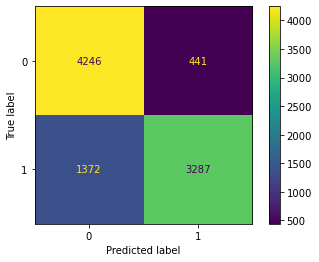

In [20]:
plot_confusion_matrix(gsv, X_test, y_test)

conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Matriz de confusion: \n {}".format(conf_metr))
print(metrics.classification_report(y_test, svc_pred_mms))
print("Accuracy: {} \n".format(metrics.accuracy_score(y_test, svc_pred_mms)))
print("Recall/Sensitivity/True Positive Rate: {} \n".format(metrics.recall_score(y_test, svc_pred_mms)))
print("Precision: {} \n".format(metrics.precision_score(y_test, svc_pred_mms)))

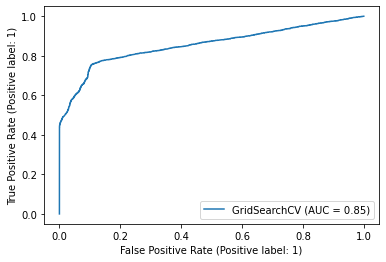

In [21]:
# ROC Curve:
metrics.plot_roc_curve(gsv, X_test, y_test)

In [22]:
import pickle

In [23]:
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [24]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8060132677081104


In [ ]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

### Guardar el Escalador y modelo

In [25]:
import joblib
joblib.dump(scaler,'escalador_cc.pkl')

['escalador_cc.pkl']

In [28]:
#best_model.save("modelo_final_cc.h5")
joblib.dump(best_model, 'modelo_final_cc.h5')

['modelo_final_cc.h5']

## Proceso para predecir un pago nuevo

In [29]:
from tensorflow.keras.models import load_model

In [31]:
modelo_cc = joblib.load("modelo_final_cc.h5")
escalador_cc = joblib.load("escalador_cc.pkl")

In [33]:
df.head()

,limit_bal,sex,age,bill_amt_sep,bill_amt_ago,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,...,pay_may_6,pay_may_7,pay_may_8,pay_apr_2,pay_apr_3,pay_apr_4,pay_apr_5,pay_apr_6,pay_apr_7,pay_apr_8
0,20000.0,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,1,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,1,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
4,50000.0,0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.columns
#df['pay_ago_1'].value_counts()

Index(['limit_bal', 'sex', 'age', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'education_1',
       'education_2', 'education_3', 'education_4', 'marriage_1', 'marriage_2',
       'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5',
       'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1',
       'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6',
       'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2',
       'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7',
       'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4',
       'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', 'pay_ap

In [52]:
cliente_muestra = {'age':23,              
                   'pay_sep_1':0, 'pay_sep_2':0, 'pay_sep_3':1, 'pay_sep_4':0, 'pay_sep_5':0,
                   'pay_sep_6':0, 'pay_sep_7':0, 'pay_sep_8':0, 'pay_ago_0':0, 'pay_ago_1':0,
                   'pay_ago_2':0, 'pay_ago_3':0, 'pay_ago_4':0, 'pay_ago_5':0, 'pay_ago_6':1,
                   'pay_ago_7':0, 'pay_ago_8':0, 'pay_jul_0':0, 'pay_jul_1':0, 'pay_jul_2':0,
                   'pay_jul_3':0, 'pay_jul_4':1, 'pay_jul_5':0, 'pay_jul_6':0, 'pay_jul_7':0,
                   'pay_jul_8':0, 'pay_jun_1':0, 'pay_jun_2':0, 'pay_jun_3':0, 'pay_jun_4':0,
                   'pay_jun_5':0, 'pay_jun_6':0, 'pay_jun_7':0, 'pay_jun_8':1, 'pay_may_2':0,
                   'pay_may_3':0, 'pay_may_4':1, 'pay_may_5':0, 'pay_may_6':0, 'pay_may_7':0,
                   'pay_may_8':0, 'pay_apr_2':0, 'pay_apr_3':0, 'pay_apr_4':1, 'pay_apr_5':0,
                   'pay_apr_6':0, 'pay_apr_7':0, 'pay_apr_8':0,
                   'pay_amt_may':35000,
                   'pay_amt_jun':10000}

In [53]:
cliente_muestra.keys()

dict_keys(['age', 'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5', 'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1', 'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6', 'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2', 'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7', 'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4', 'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2', 'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7', 'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', 'pay_apr_5', 'pay_apr_6', 'pay_apr_7', 'pay_apr_8', 'pay_amt_may', 'pay_amt_jun'])

In [50]:
from sklearn.preprocessing import LabelBinarizer
codificador = LabelBinarizer()
final_y = codificador.fit_transform(y)
codificador.classes_

array([0, 1], dtype=int64)

In [62]:
def devuelve_prediccion(modelo, escalador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    caracteristicas = ['age', 'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5',
       'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1',
       'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6',
       'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2',
       'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7',
       'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4',
       'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', 'pay_apr_5',
       'pay_apr_6', 'pay_apr_7', 'pay_apr_8', 'pay_amt_may','pay_amt_jun']
    
    
    #long_sep = muestra_json['long_sepalo']
    #ancho_sep = muestra_json['ancho_sepalo']
    #long_pet = muestra_json['long_petalo']
    #ancho_pet = muestra_json['ancho_petalo']
    
    data = []
    for i in caracteristicas:
        data.append(muestra_json[i])
    #flor = [[long_sep, ancho_sep,
     #        long_pet, ancho_pet]]
    
    cliente = [data]
    cliente = escalador.transform(cliente)
    
    clases = np.array([0,1])
    
    #clase_ind = modelo.predict_classes(flor)
    clase_ind = np.argmax(modelo.predict(cliente), axis=-1)
    
    return clases[clase_ind]

prediccion = devuelve_prediccion(modelo_cc,
                    escalador_cc,
                    cliente_muestra)
prediccion

0

In [64]:
if(prediccion==0):
    print('No tendra incumplimiento de pago al mes siguiente ')
else:
    print('Si tendra incumplimiento de pago al mes siguiente ')

No tendra incumplimiento de pago al mes siguiente 
